[IPython Notebook](sun.ipynb) |  [Python Script](sun.py)

Sun (single rotating star)
============================

**NOTE: single stars are not officially supported yet and may be broken**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.Bundle.default_star(starA='sun')

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Setting Parameters
-----------------------

In [3]:
print b['sun']

rpole@sun@component: 1.0 solRad
*pot@sun@component: 1.0
teff@sun@component: 10000.0 K
abun@sun@component: 0.0
period@sun@component: 1.0 d
*freq@sun@component: 6.283185 rad / d
incl@sun@component: 90.0 deg
gravblaw@sun@component: zeipel
gravb_bol@sun@component: 0.32
alb_bol@sun@component: 0.4
ld_func_bol@sun@component: logarithmic
ld_coeffs_bol@sun@component: [ 0.5  0.5]
mass@sun@component: 1.0 solMass
freq@constraint: 6.283185 / {period@sun@component}
pot@constraint: rotstarrpole2potential({rpole@sun@component}, {freq@sun@component})


Let's set all the values of the sun based on the nominal solar values provided in the units package.

In [4]:
b.set_value('teff', 1.0*u.solTeff)
b.set_value('rpole', 1.0*u.solRad)
b.set_value('mass', 1.0*u.solMass)
b.set_value('period', 24.47*u.d)


And so that we can compare with measured/expected values, we'll observe the sun from the earth - with an inclination of 23.5 degrees and at a distance of 1 AU.

In [5]:
b.set_value('incl', 23.5*u.deg)
b.set_value('distance', 1.0*u.AU)

Checking on the set values, we can see the values were converted correctly to PHOEBE's internal units.

In [6]:
print b.get_quantity('teff')
print b.get_quantity('rpole')
print b.get_quantity('mass')
print b.get_quantity('period')
print b.get_quantity('incl')
print b.get_quantity('distance')

5772.0 K
1.0 solRad
1.0 solMass
24.47 d
23.5 deg
1.495978707e+11 m


Running Compute
--------------------

Let's add a light curve so that we can compute the flux at a single time and compare it to the expected value.  We'll set the passband luminosity to be the nominal value for the sun.

In [7]:
b.add_dataset('LC', pblum=1*u.solLum)

<ParameterSet: 14 parameters | methods: LC, LC_dep>

Now we run our model and store the mesh so that we can plot the temperature distributions and test the size of the sun verse known values.

In [8]:
b.run_compute(store_mesh=True, distortion_method='rotstar', mesh_offset=False)

<ParameterSet: 49 parameters | methods: MESH, LC>

Comparing to Expected Values
--------------------------------

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


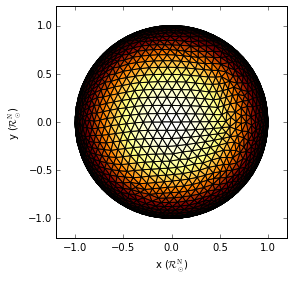

In [9]:
axs, artists = b['protomesh'].plot(facecolor='teff')

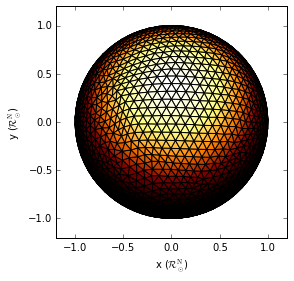

In [10]:
axs, artists = b['automesh'].plot(facecolor='teff')

In [11]:
print "teff: {} ({})".format(b.get_value('teff', dataset='automesh').mean(), 
                             b.get_value('teff', context='component'))

teff: 5771.99999913 (5772.0)


In [12]:
print "rpole: {} ({})".format(b.get_value('rpole', dataset='automesh'), 
                              b.get_value('rpole', context='component'))

rpole: 1.0 (1.0)


For a rotating sphere, the minimum radius should occur at the pole and the maximum should occur at the equator.

In [13]:
print "rmin (pole): {} ({})".format(b.get_value('r', dataset='automesh').min(), 
                             b.get_value('rpole', context='component'))

rmin (pole): 1.00000000103 (1.0)


In [14]:
print "rmax (equator): {} (>{})".format(b.get_value('r', dataset='automesh').max(), 
                              b.get_value('rpole', context='component'))

rmax (equator): 1.00000028355 (>1.0)


In [15]:
print "logg: {}".format(b.get_value('logg', dataset='automesh').mean())

logg: 4.4380672978


In [16]:
print "flux: {}".format(b.get_quantity('flux@model')[0])

flux: 1284.74534133 W / m2
